### 1. Problem Statement
To understand how student performance (test scores) is influenced by various factors, including Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation Course.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

#### Data Checks to Perform
- Check Missing Values
- Check Duplicates
- Check Data Type
- Check the Number of Unique Values of Each Column
- Check Statistics of Data Set
- Check Various Categories Present in Different Categorical Columns

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### insights
- No missing values
- No duplicate values
- No null values
- All means are very close to each other i.e. between 66 and 68.05
- All standard deviations are also close i.e. between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading is more higher = 17

In [14]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
#Check categories in each columns
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Getting the Total score and Average

In [18]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
# Count the number of students with full marks (100) in each subject
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

# Print the count of students with full marks in each subject
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

# Calculate the percentage of students with full marks in each subject
total_students = len(df)
percentage_math_full = (math_full / total_students) * 100
percentage_writing_full = (writing_full / total_students) * 100
percentage_reading_full = (reading_full / total_students) * 100

print()
# Print the percentage of students with full marks in each subject
print(f'Percentage of students with full marks in Maths: {percentage_math_full:.2f}%')
print(f'Percentage of students with full marks in Writing: {percentage_writing_full:.2f}%')
print(f'Percentage of students with full marks in Reading: {percentage_reading_full:.2f}%')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17

Percentage of students with full marks in Maths: 0.70%
Percentage of students with full marks in Writing: 1.40%
Percentage of students with full marks in Reading: 1.70%


In [20]:
# Count the number of students with less than or equal to 20 marks in each subject
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

# Print the count of students with less than or equal to 20 marks in each subject
print(f'Number of students with less than or equal to 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than or equal to 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than or equal to 20 marks in Reading: {reading_less_20}')

# Calculate the percentage of students with less than or equal to 20 marks in each subject
total_students = len(df)
percentage_math_less_20 = (math_less_20 / total_students) * 100
percentage_writing_less_20 = (writing_less_20 / total_students) * 100
percentage_reading_less_20 = (reading_less_20 / total_students) * 100

print()
# Print the percentage of students with less than or equal to 20 marks in each subject
print(f'Percentage of students with less than or equal to 20 marks in Maths: {percentage_math_less_20:.2f}%')
print(f'Percentage of students with less than or equal to 20 marks in Writing: {percentage_writing_less_20:.2f}%')
print(f'Percentage of students with less than or equal to 20 marks in Reading: {percentage_reading_less_20:.2f}%')

Number of students with less than or equal to 20 marks in Maths: 4
Number of students with less than or equal to 20 marks in Writing: 3
Number of students with less than or equal to 20 marks in Reading: 1

Percentage of students with less than or equal to 20 marks in Maths: 0.40%
Percentage of students with less than or equal to 20 marks in Writing: 0.30%
Percentage of students with less than or equal to 20 marks in Reading: 0.10%


##### Insights 
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

### Visualization

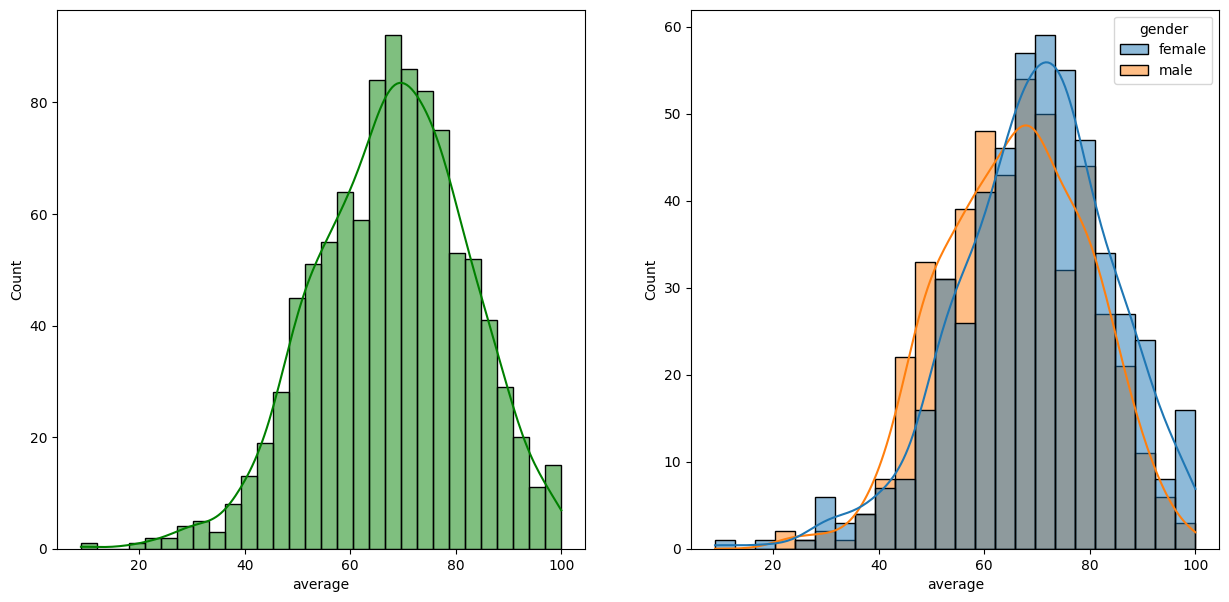

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

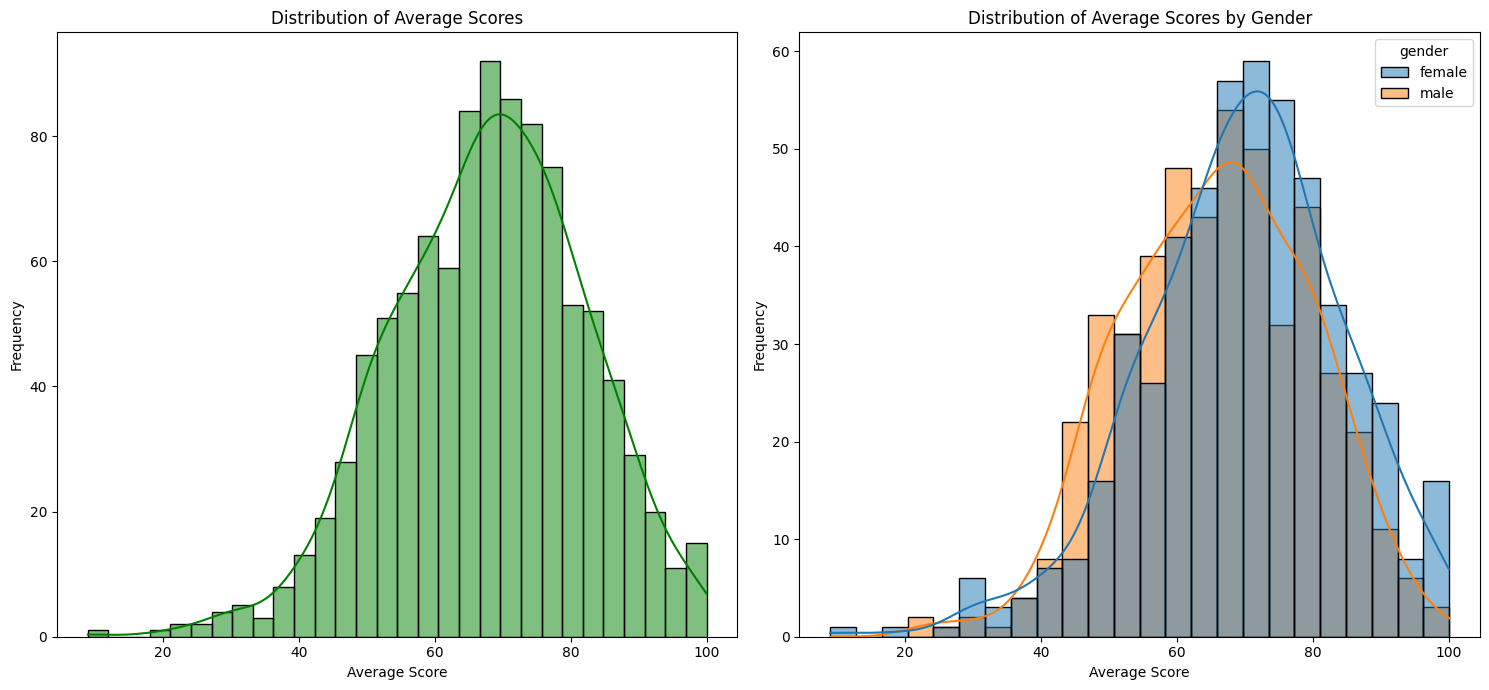

In [22]:
# Create a subplot with two histograms side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first histogram with KDE for the overall average score
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Plot the second histogram with KDE, differentiated by gender
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.title('Distribution of Average Scores by Gender')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Display the subplots
plt.tight_layout()
plt.show()

##### Insights
- Female students tend to perform well then male students.

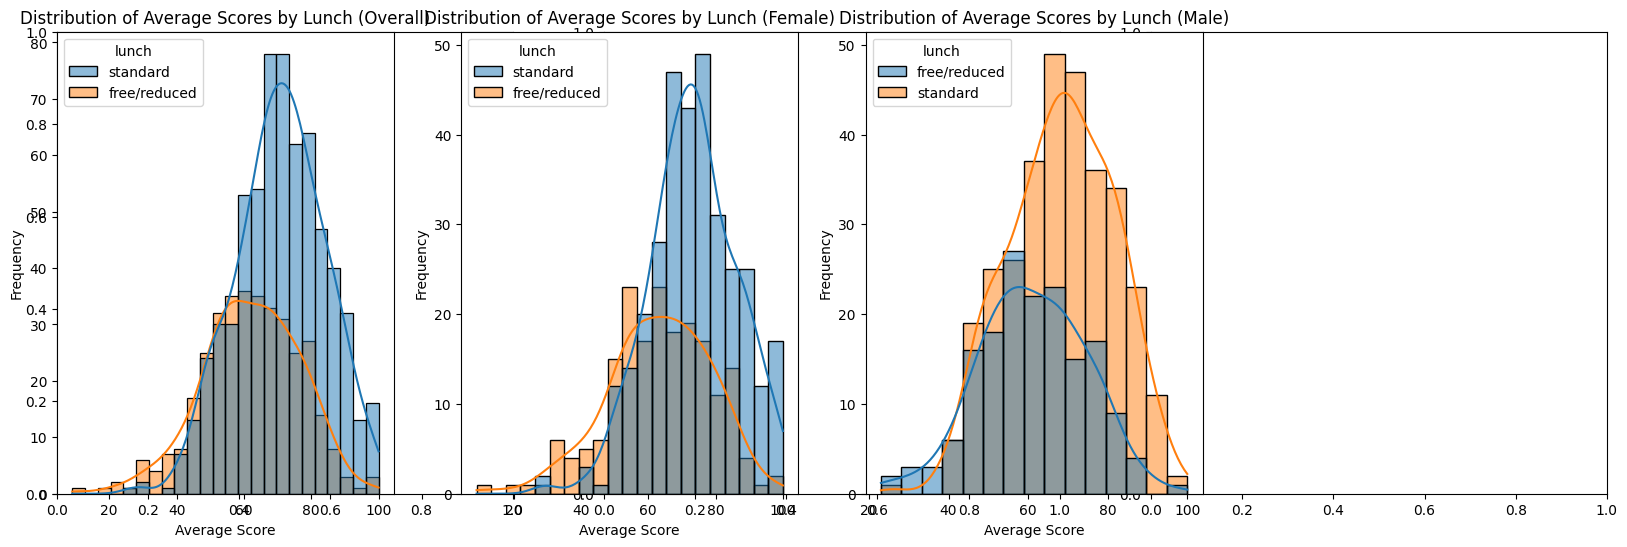

In [24]:
# Create a subplot with three histograms side by side
plt.subplots(1, 3, figsize=(20, 6))

# Plot the first histogram with KDE, differentiated by lunch type (Overall)
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Overall)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Plot the second histogram with KDE, differentiated by lunch type (Female)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Female)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Plot the third histogram with KDE, differentiated by lunch type (Male)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Male)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Display the subplots
plt.tight_layout()
plt.show()

##### Insights
- Standard lunch helps perform well in exams
- Standard lunch helps perform well in exams be it a male or a female

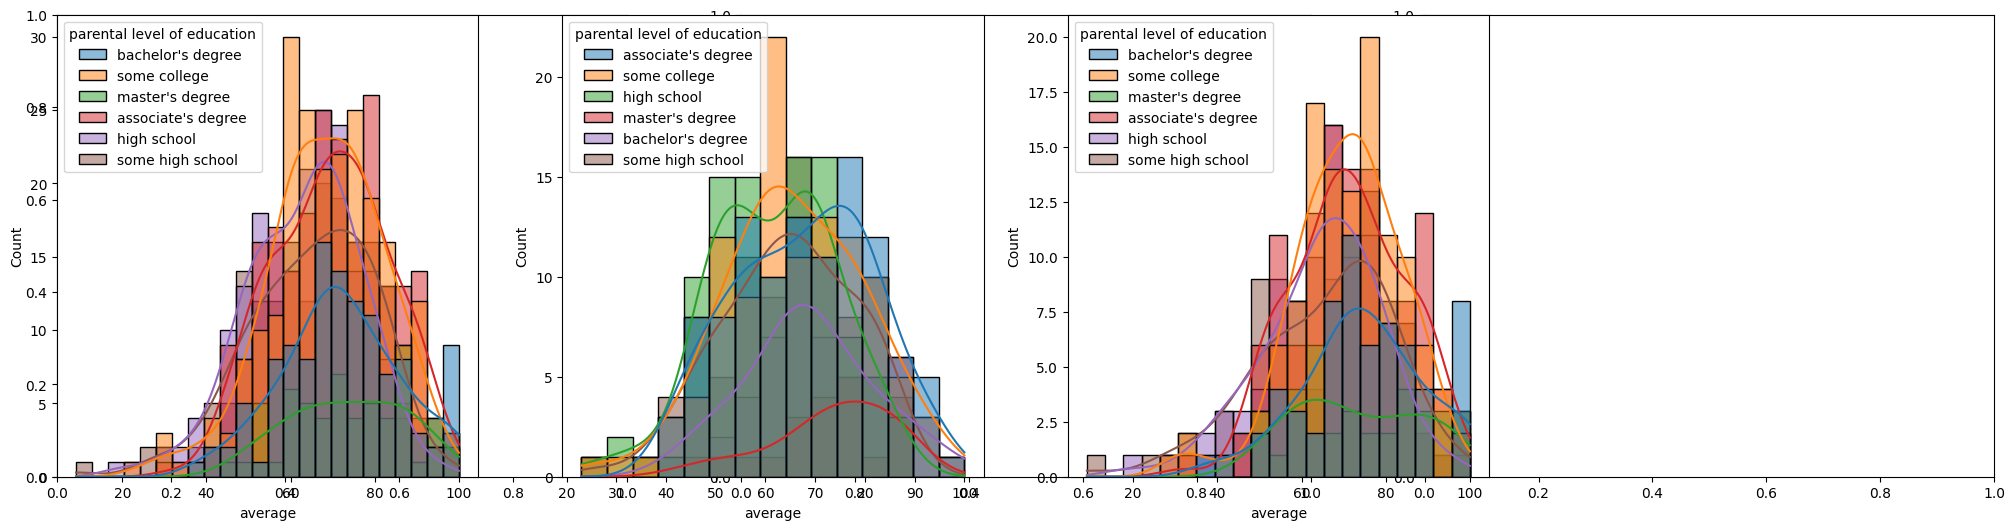

In [25]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')

plt.show()

##### Insights
- Parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

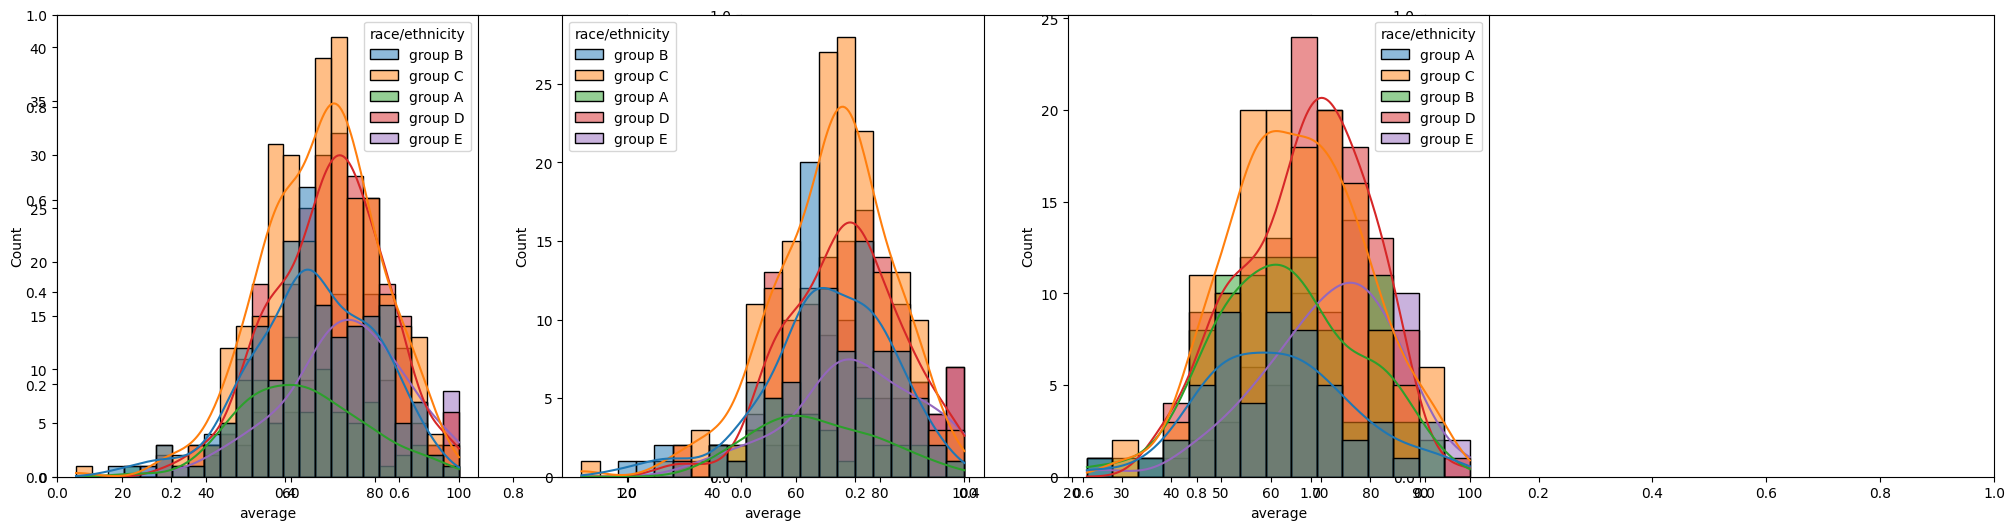

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

##### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### Maximum Score of Students in All Three Subjects using Violin Plot

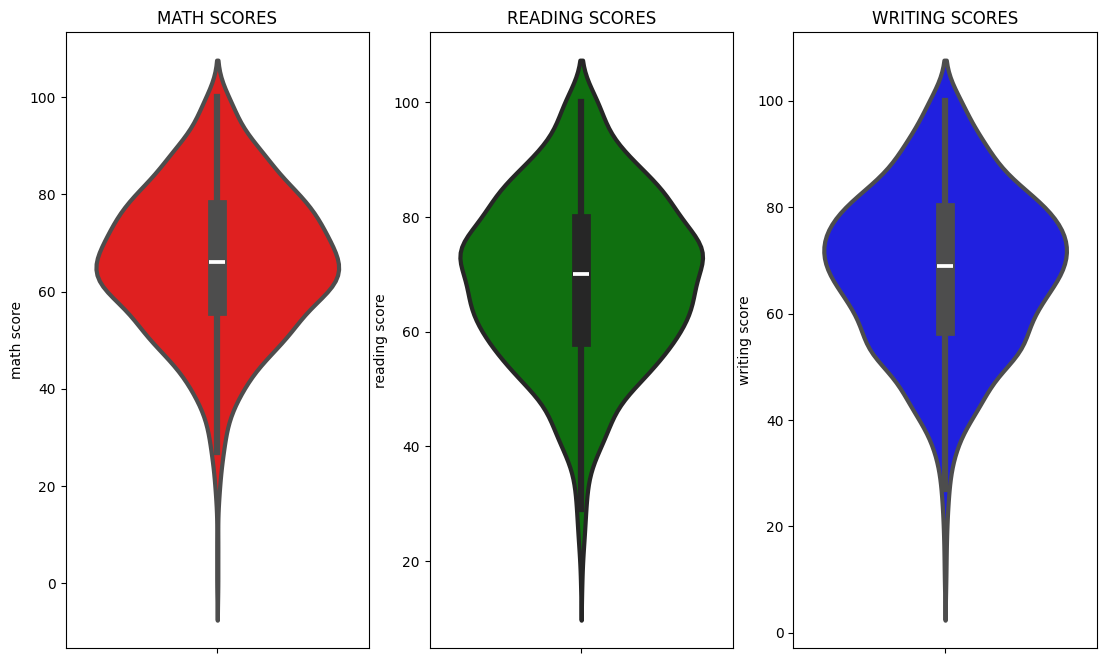

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

##### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate Analysis Using Pie Plot

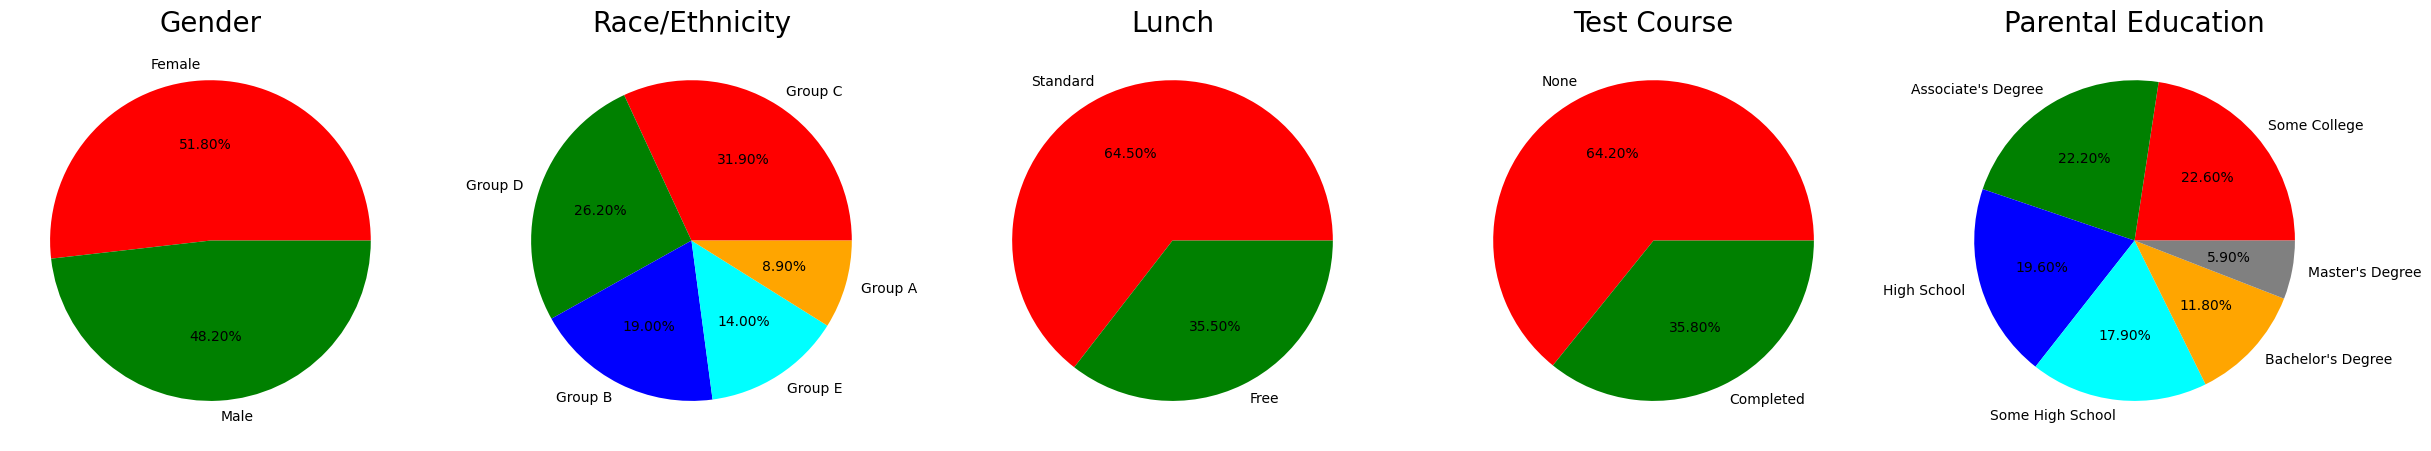

In [28]:
# Set the figure size for the entire plot
plt.rcParams['figure.figsize'] = (30, 12)

# Create a subplot with five pie charts side by side
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Continue with similar code blocks for other pie charts

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

# Adjust the layout and display the subplots

plt.grid()
plt.show()

##### Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Feature wise visualisation

### Gender wise
1. How is the distribution of Gender ?  (Univariate Analysis)
2. Does Gender have any impact on student's performance ? (Bivariate Analysis)

#### Univariate Analysis of Gender

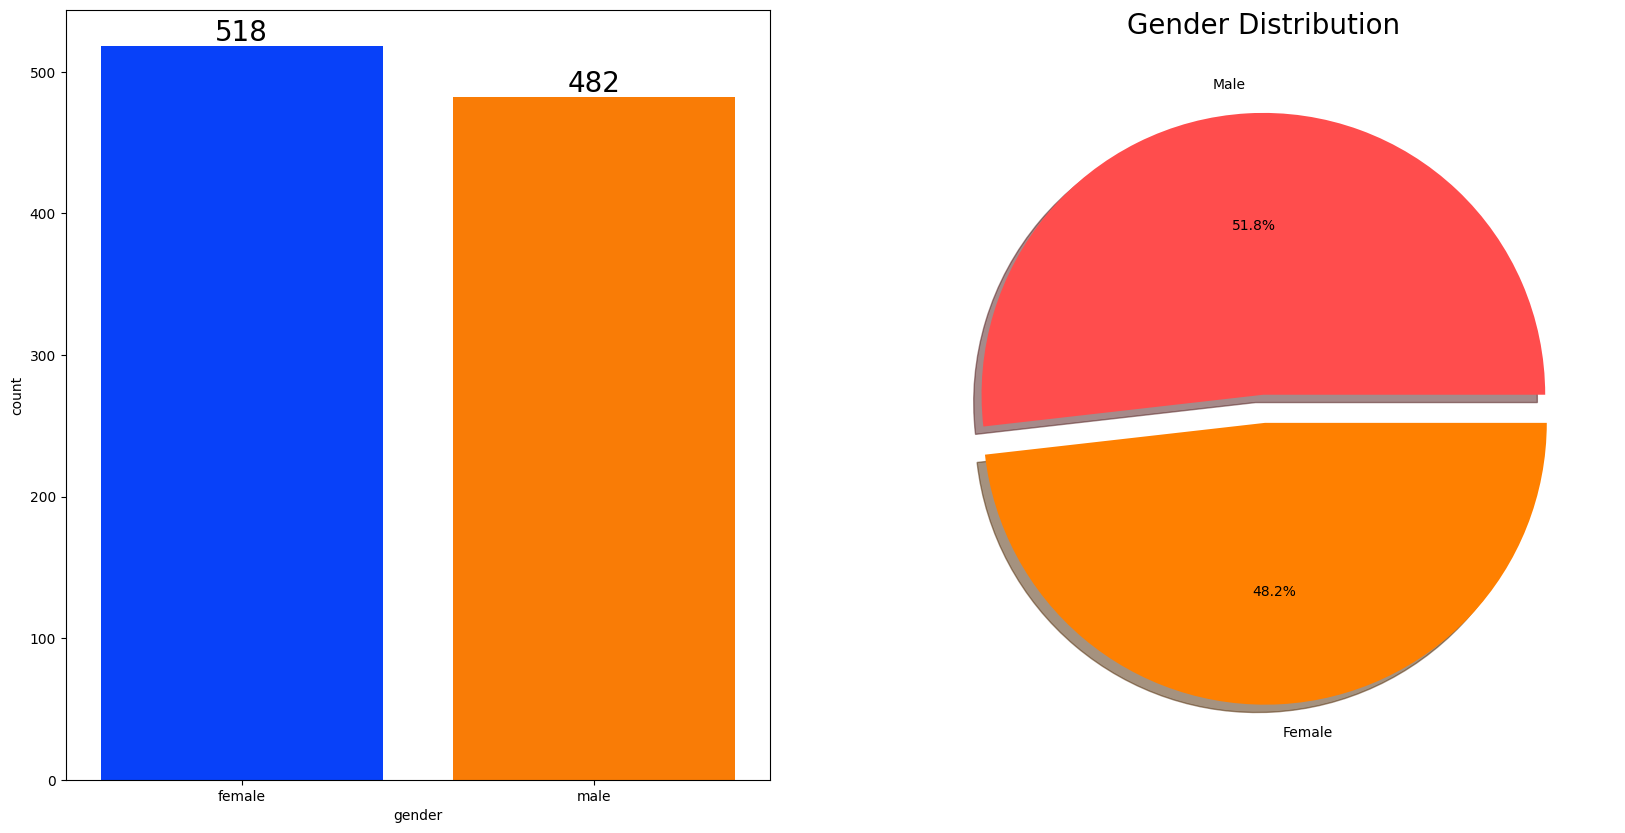

In [29]:
# Create a subplot with two plots side by side
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for gender on the left side
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart for gender distribution on the right side
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1],
        autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.title('Gender Distribution', fontsize=20)

# Display the subplots

plt.show()

##### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### Bivariate Analysis

In [36]:
gender_group = df.groupby('gender').mean(numeric_only = True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


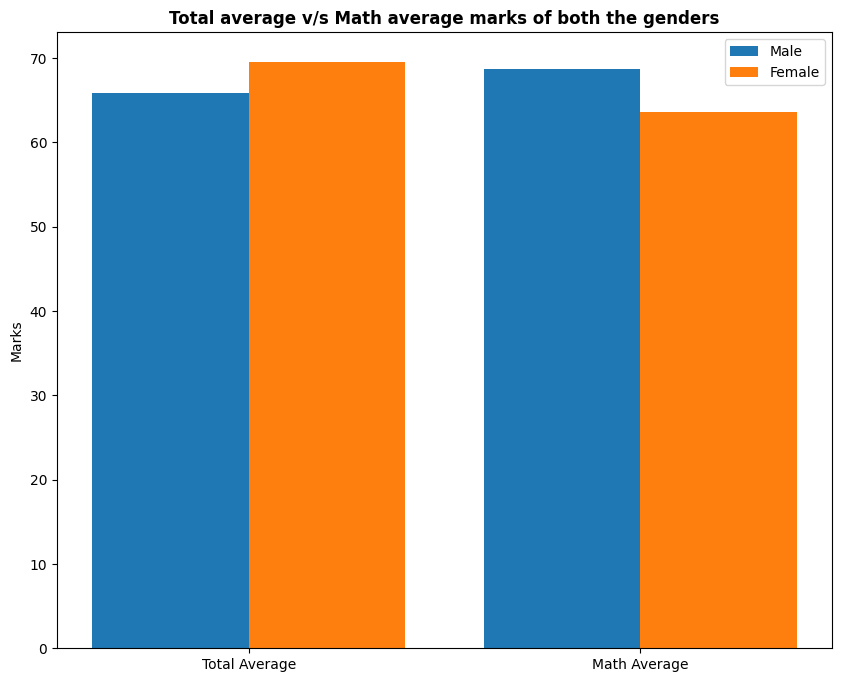

In [37]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights
- On an average females have a better overall score than men whereas males have scored higher in Maths.
------------------------------------------------------------------------------------------------------------------------------------------------

### Race/Ethinicity wise
1. How is the distribution of Race/Ethinicity ?  (Univariate Analysis)
2. Does race/Ethinicity have any impact on student's performance ? (Bivariate Analysis)

#### Univariate Analysis

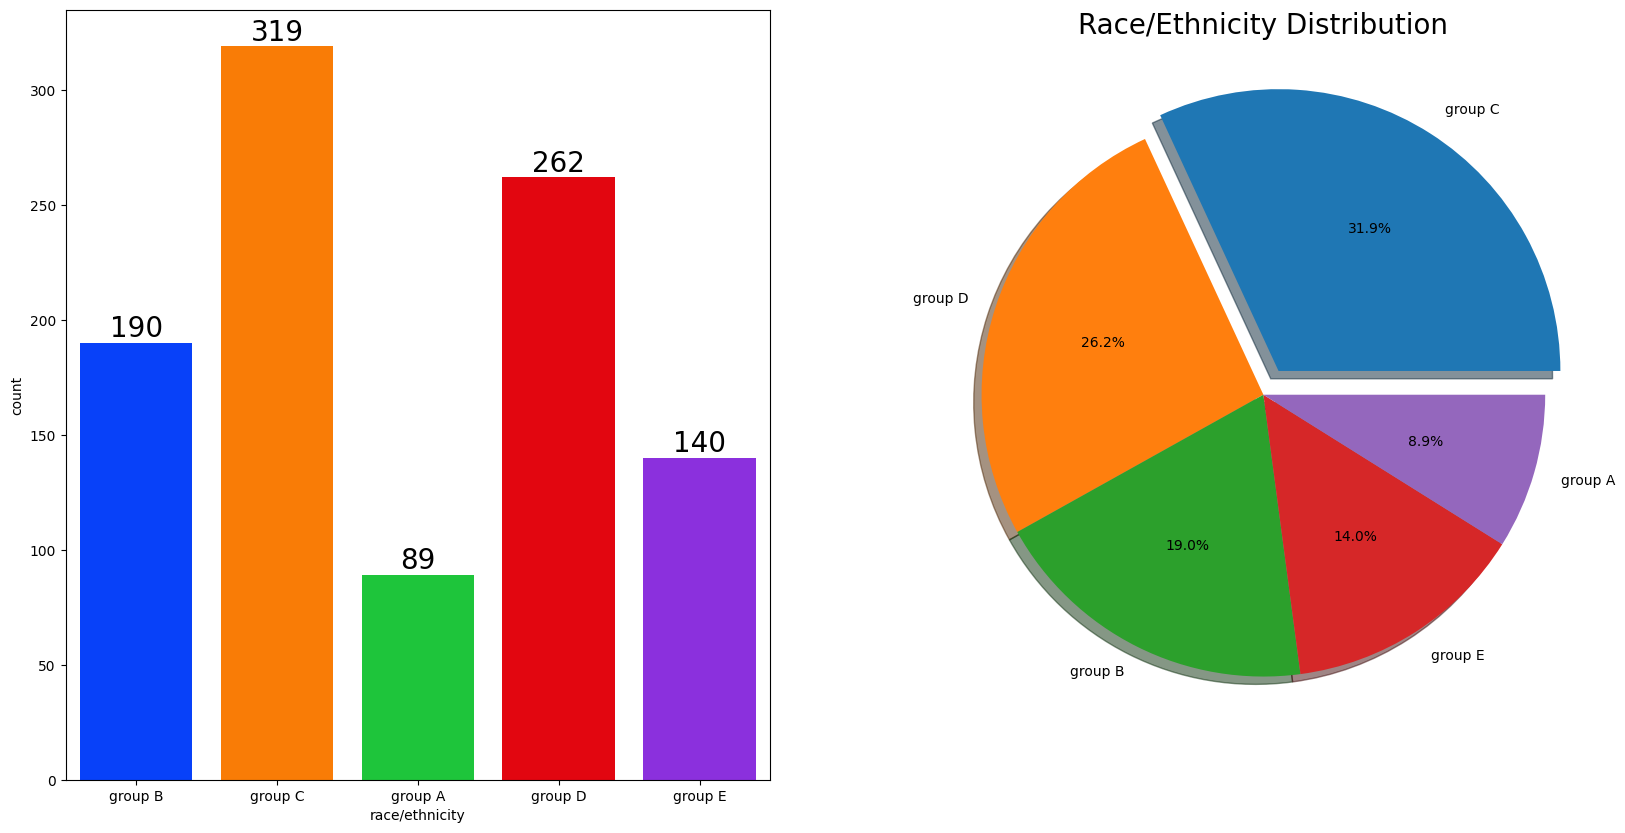

In [38]:
# Create a subplot with two plots side by side
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for race/ethnicity on the left side
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart for race/ethnicity distribution on the right side
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.title('Race/Ethnicity Distribution', fontsize=20)

# Display the subplots
plt.show()

##### Insights
- Majority of the student belong to group C /group D
- Lowest number of students belong to groupA

#### Bivariate Analysis

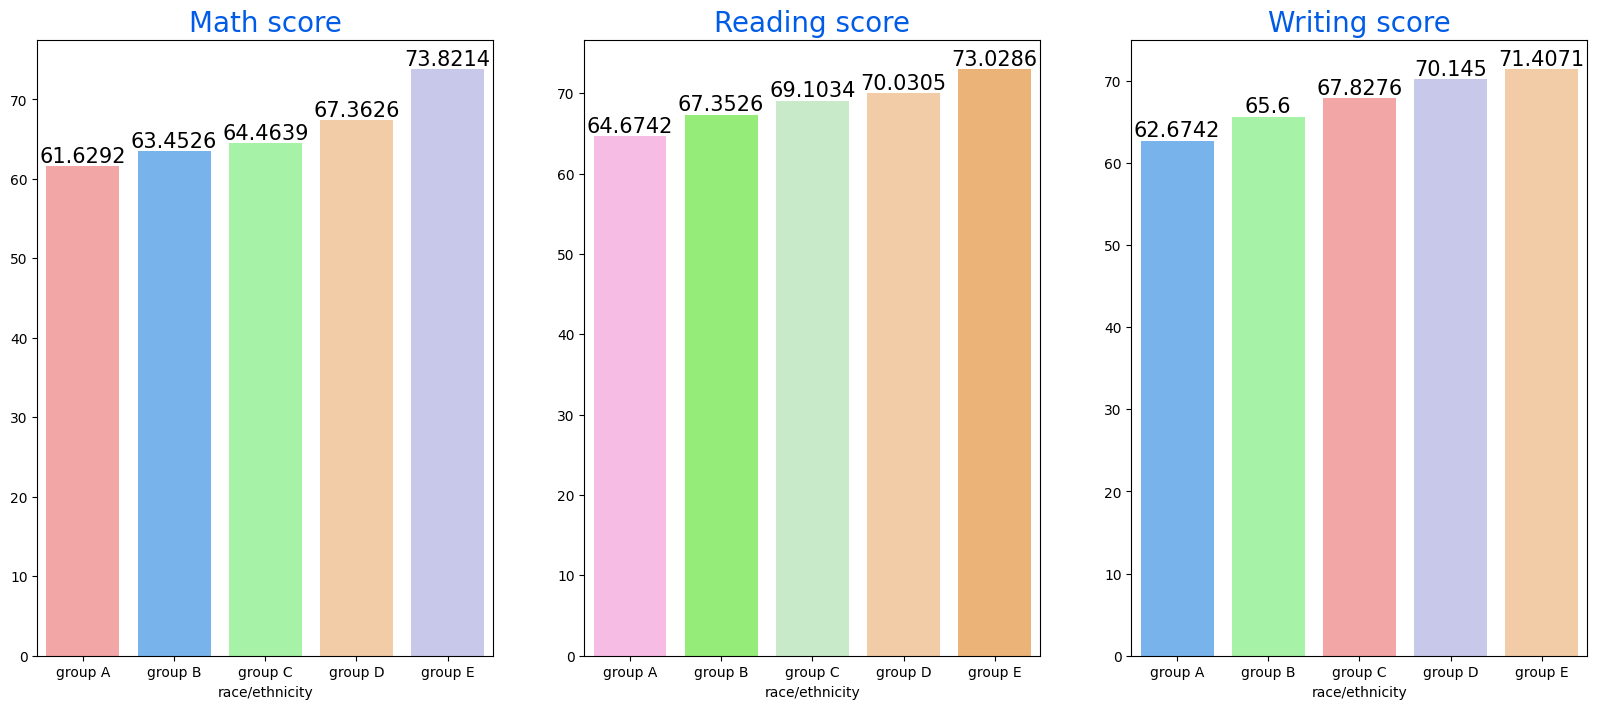

In [39]:
# Group the data by 'race/ethnicity'
Group_data2 = df.groupby('race/ethnicity')

# Define custom color palettes
math_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
reading_palette = ['#ffb3e6', '#8cff66', '#c2f0c2', '#ffcc99', '#ffb366']
writing_palette = ['#66b3ff', '#99ff99', '#ff9999', '#c2c2f0', '#ffcc99']

# Create a subplot with three bar plots side by side
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot the bar plot for mean Math scores on the left
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values,
            palette=math_palette, ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot the bar plot for mean Reading scores in the middle
sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values,
            palette=reading_palette, ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot the bar plot for mean Writing scores on the right
sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values,
            palette=writing_palette, ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Display the subplots

plt.show()

##### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects
------------------------------------------------------------------------------------------------------------------------------------------------

### PARENTAL LEVEL OF EDUCATION 
1. What is the educational background of students' parents? (Univariate Analysis)
2. Does parental education impact student's performance? (Bivariate Analysis)

#### Univariate Analysis

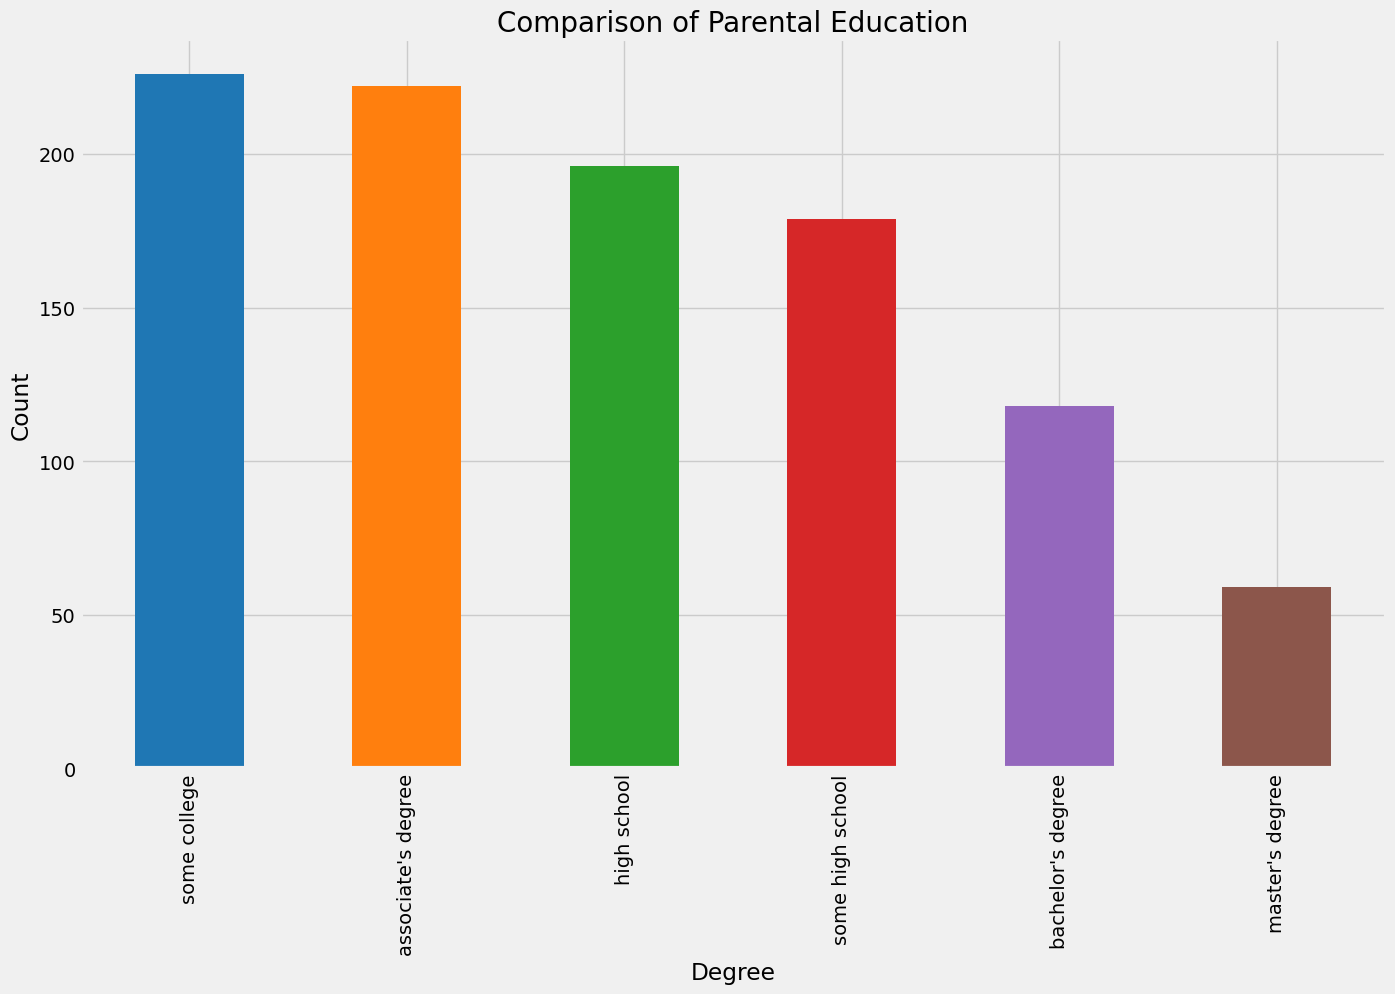

In [40]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create a bar plot for the count of each parental level of education
df['parental level of education'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Set title and labels
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Display the plot
plt.show()

##### Insights
- Largest number of parents are from some college.

#### Bivariate Analysis

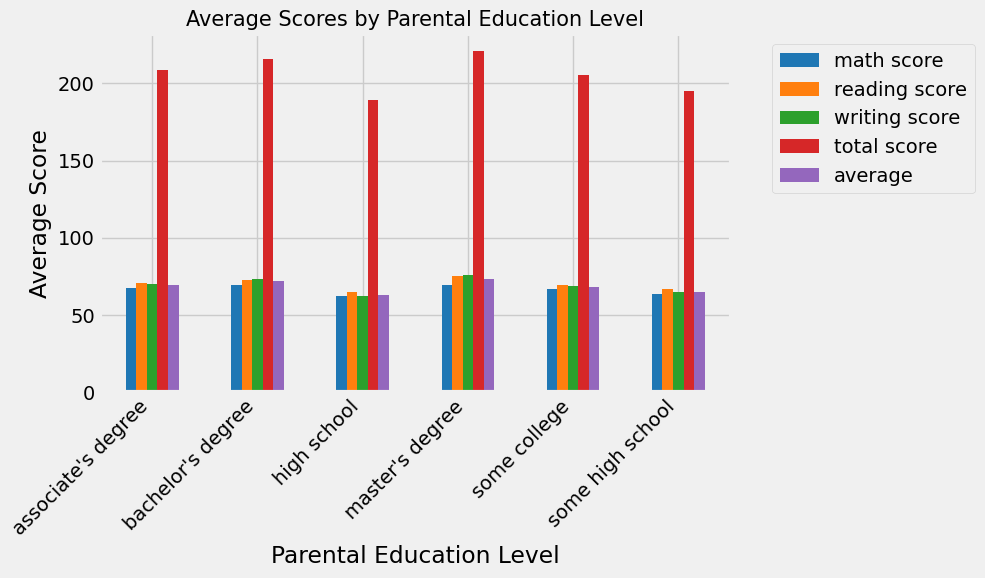

In [43]:
# Set the style and figure size
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['figure.figsize'] = (10, 6)

# Group the data by 'parental level of education' and calculate the mean for each group
mean_scores_by_education = df.groupby('parental level of education').mean(numeric_only = True)

# Create a grouped bar chart
mean_scores_by_education.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Set title and labels
plt.title('Average Scores by Parental Education Level', fontsize=15)
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

##### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.
--------------------------------------------------------------------------------------------------------------------------------------------------

### Lunch
1. Which type of lunch is most common among students? (Univariate Analysis)
2. What is the effect of lunch type on test results? (Bivariate Analysis)

#### Univariate Analysis

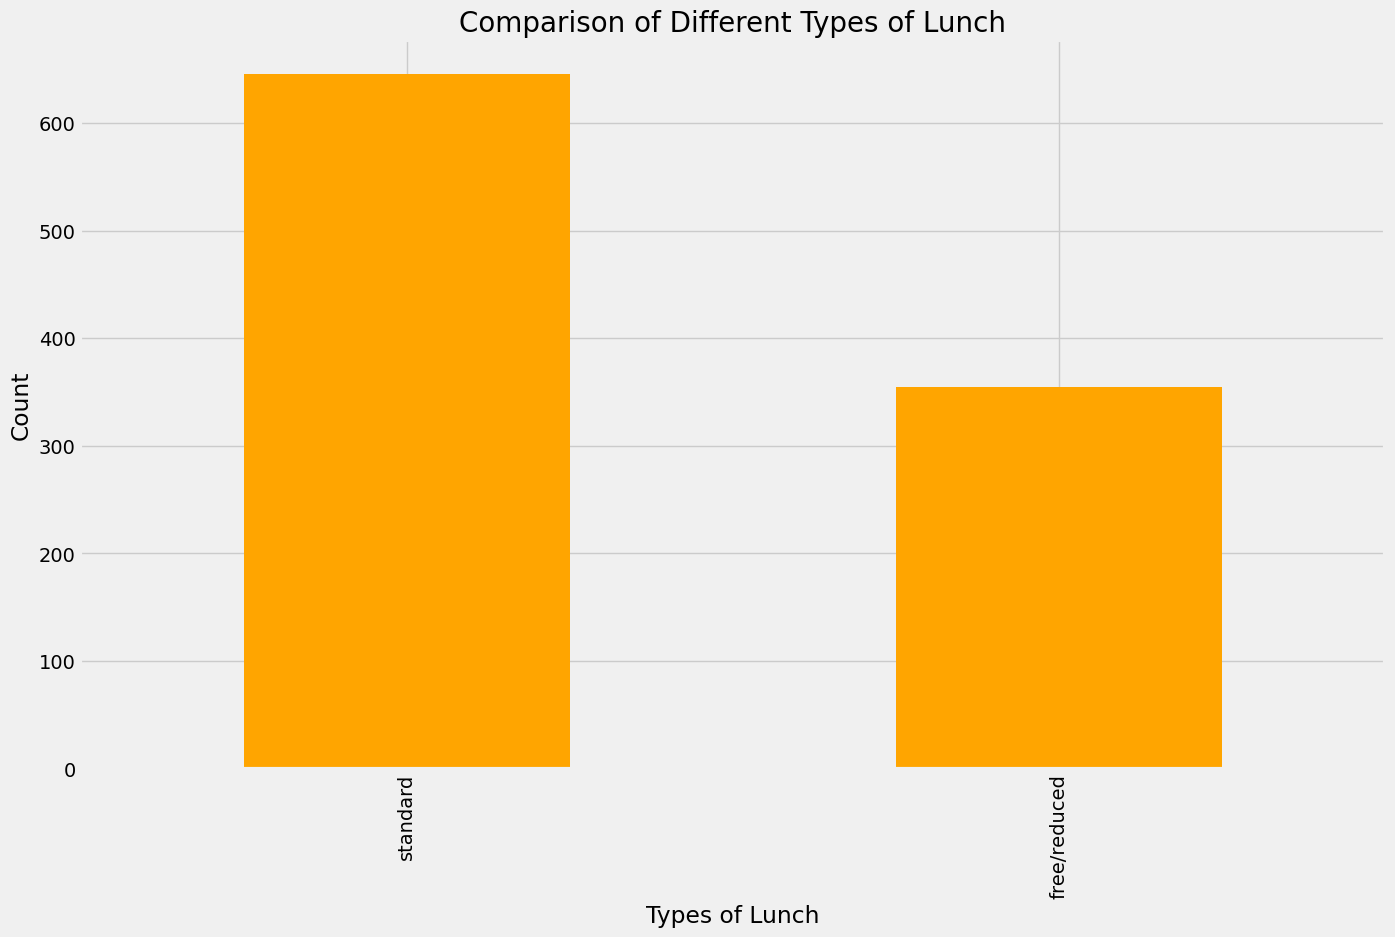

In [45]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-colorblind')

# Create a bar plot for the count of each type of lunch
df['lunch'].value_counts().plot(kind='bar', color='Orange')

# Set title and labels
plt.title('Comparison of Different Types of Lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Display the plot
plt.show()

##### Insights
- Students being served Standard lunch was more than free lunch

#### Bivariate Analysis

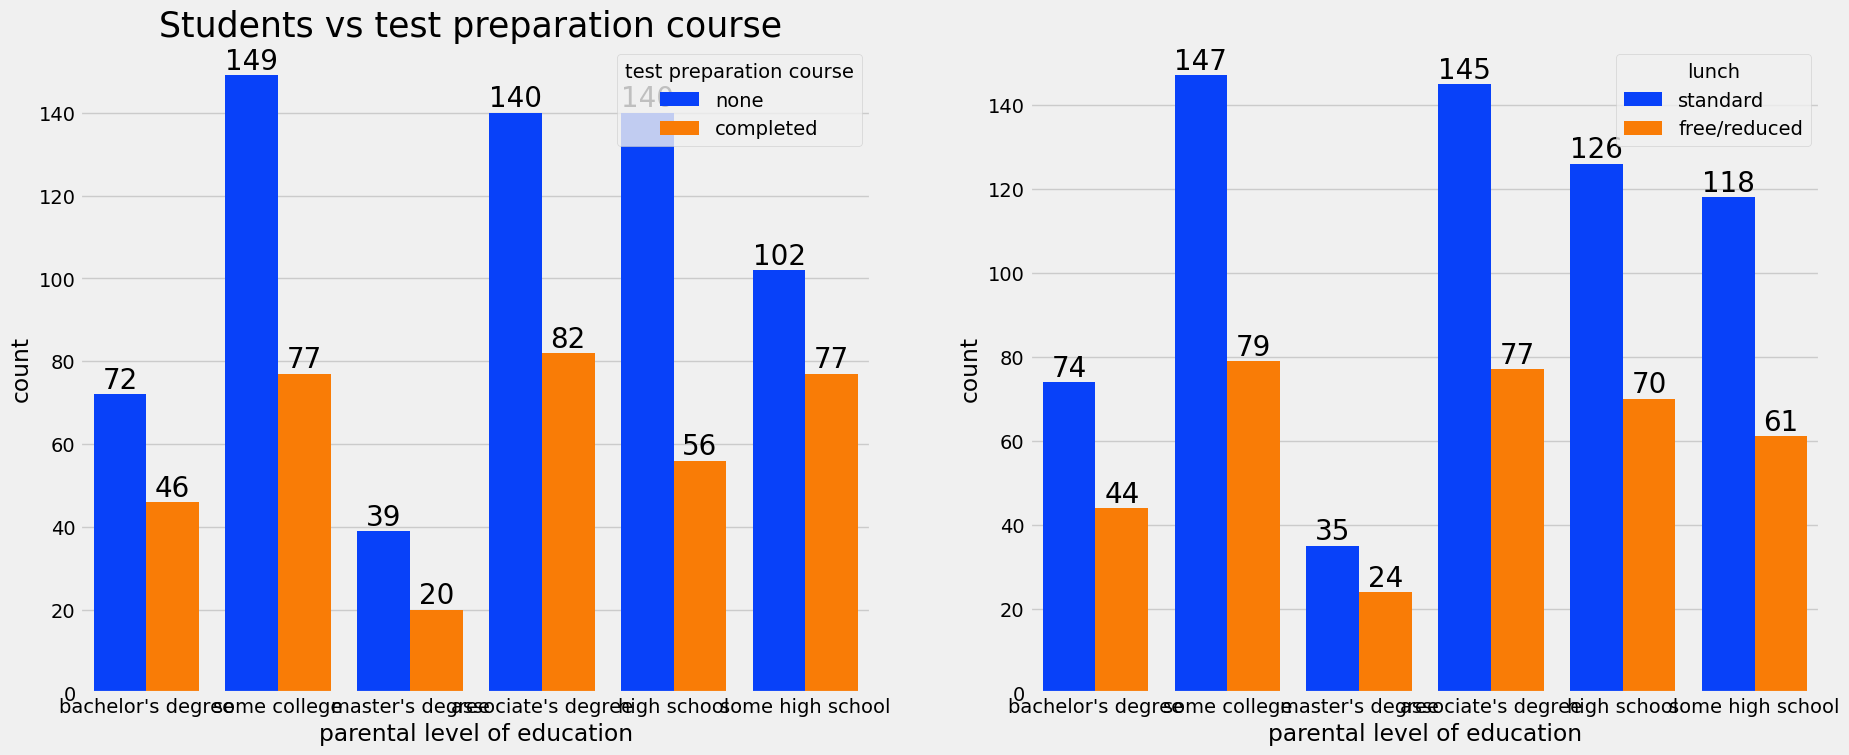

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

##### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch
----------------------------------------------------------------------------------------------------------------------------------------------

### TEST PREPARATION
1. Is Test preparation course impacting student's performance? (Bivariate Analysis)

#### Bivariate Analysis

<Axes: xlabel='lunch', ylabel='writing score'>

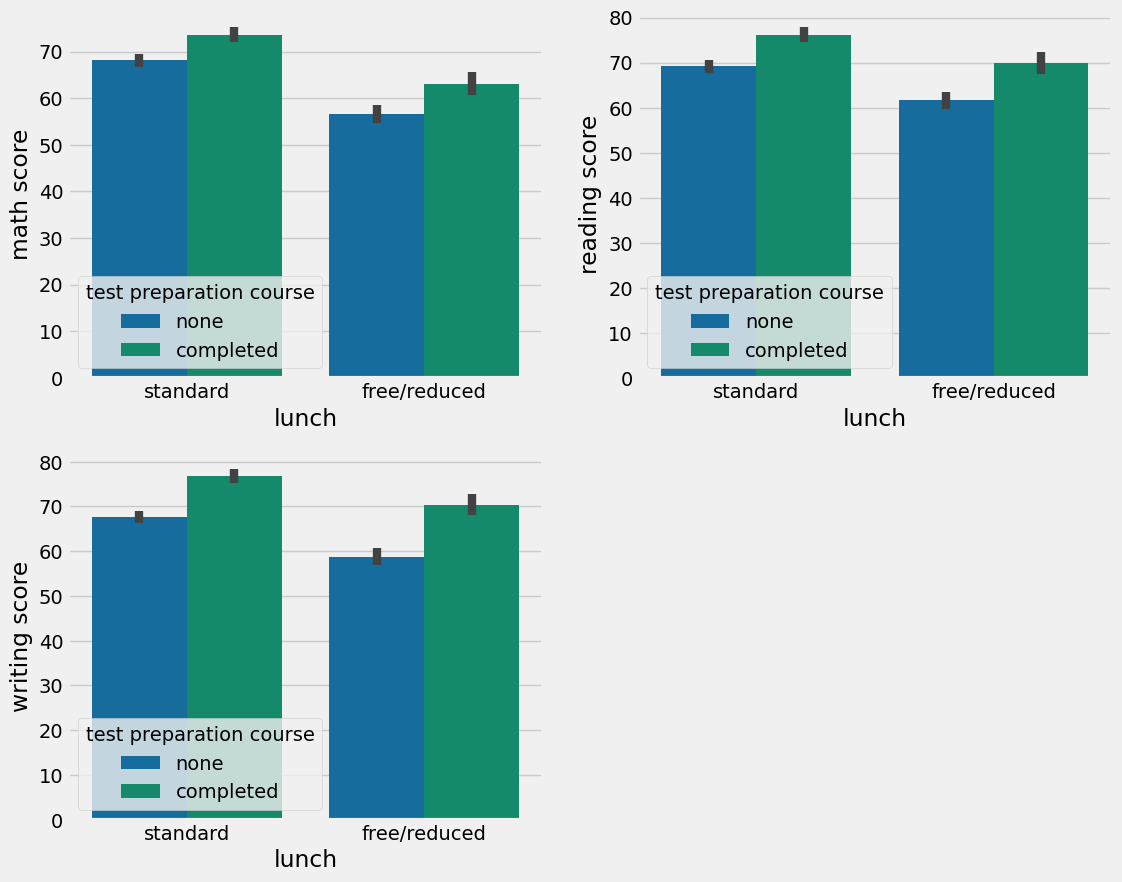

In [48]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

##### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

## Outliers

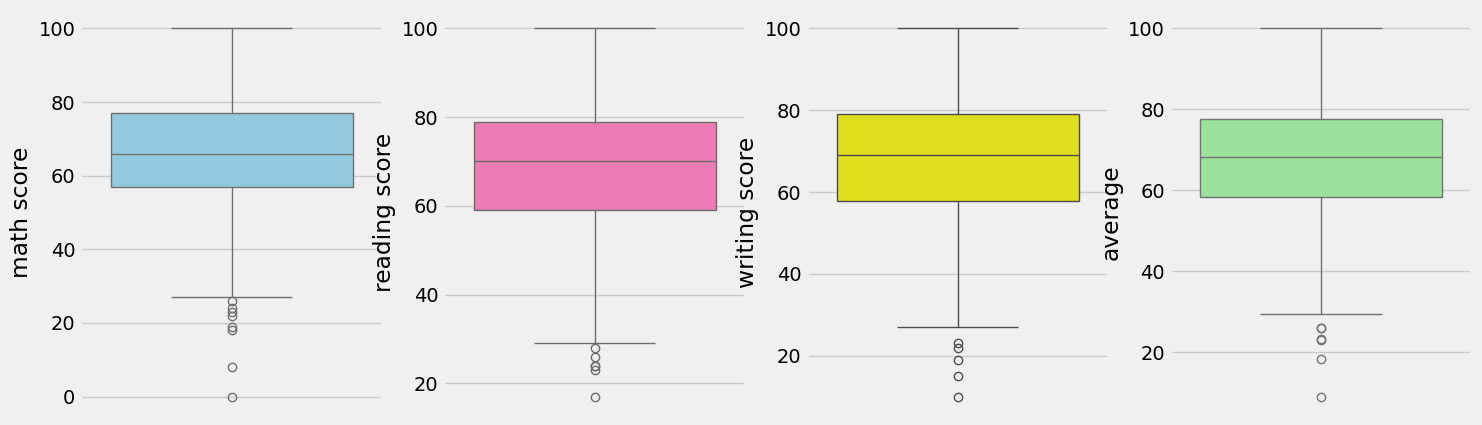

In [49]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## Multiplot Analysis with Pairplot

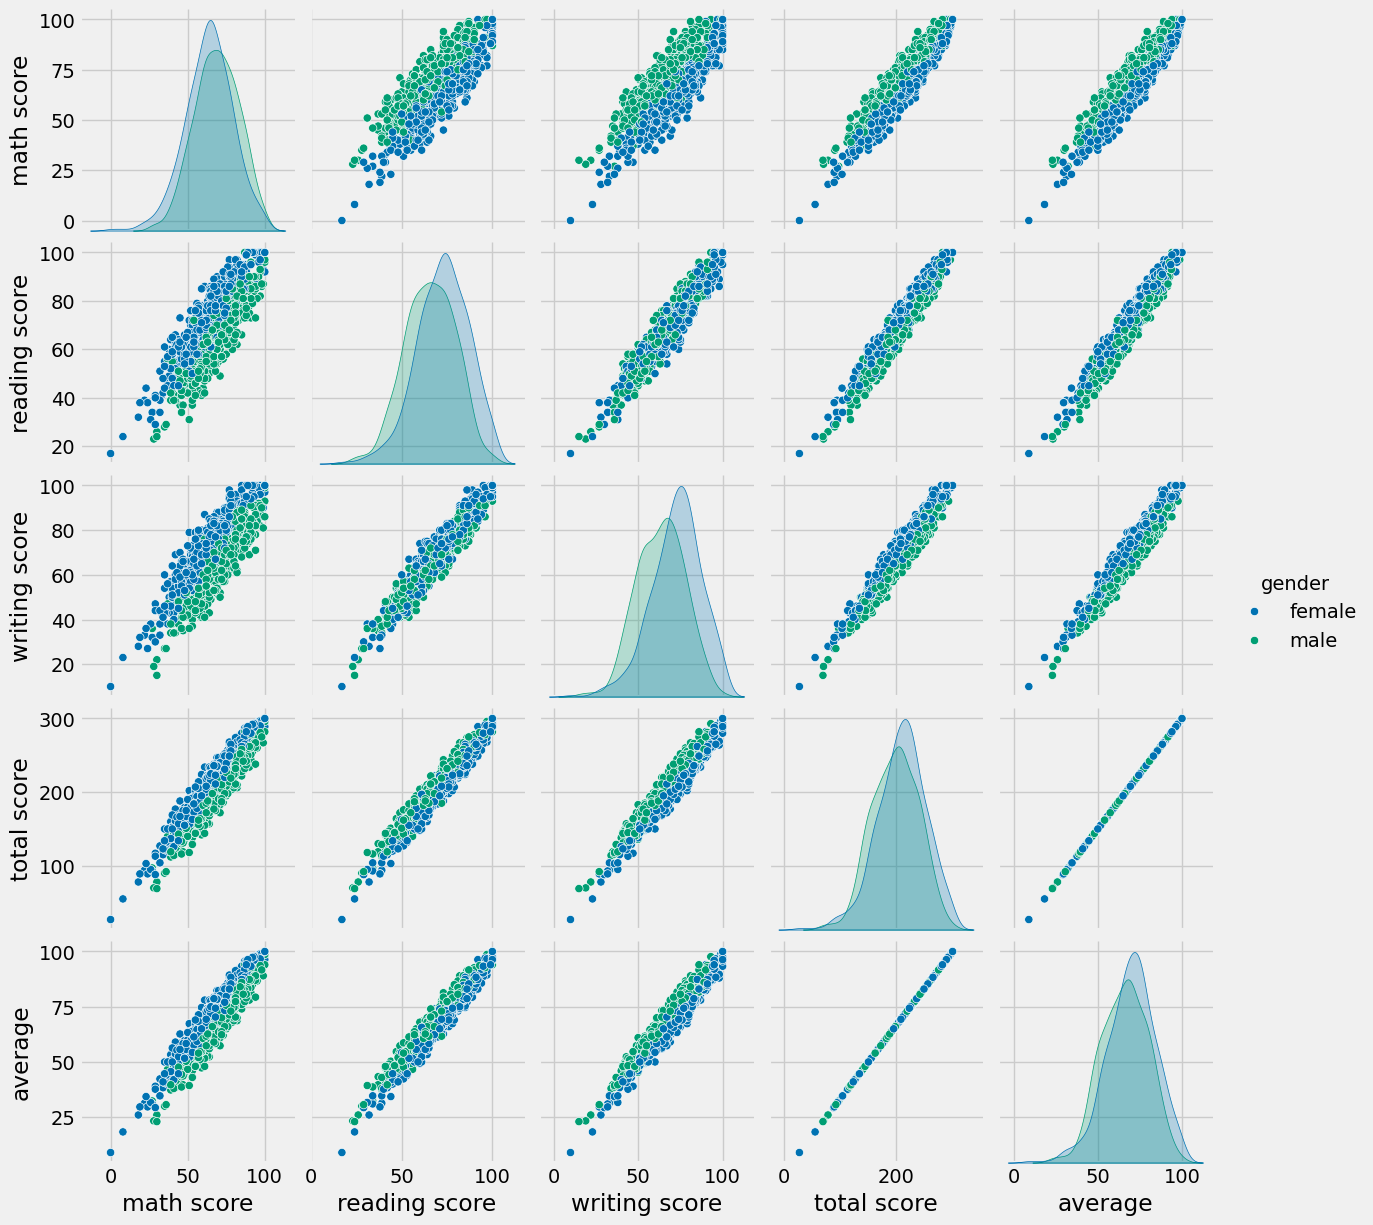

In [50]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

## Conclusion from EDA

- Student's performance is correlated with factors such as lunch, race, and parental level of education.
- Females have a higher pass percentage and also achieve top scores.
- Student's performance doesn't show a strong correlation with completing a test preparation course.
- Completing a preparation course has shown to be beneficial.